In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('DataCoSupplyChainDataset.csv',encoding='latin1')

C:\Users\Abin\AppData\Local\Temp\ipykernel_14060\1558929650.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('DataCoSupplyChainDataset.csv',encoding='latin1')


In [102]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Late,Month,Product_Delay_Frequency,Stockout_Risk
0,DEBIT,3,4,91.25,NaN,Advance shipping,0,73,Sporting Goods,Caguas,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,02/03/2018 22:56,Standard Class,0,1.0,214,0
1,TRANSFER,5,4,-2.490.899.963,NaN,Late delivery,1,73,Sporting Goods,Caguas,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,1,1.0,214,0
2,CASH,4,4,-2.477.799.988,NaN,Shipping on time,0,73,Sporting Goods,San Jose,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class,0,1.0,214,0
3,DEBIT,3,4,2.286.000.061,NaN,Advance shipping,0,73,Sporting Goods,Los Angeles,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class,0,1.0,214,0
4,PAYMENT,2,4,1.342.100.067,298.25,Advance shipping,0,73,Sporting Goods,Caguas,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class,0,1.0,214,0


In [4]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [5]:
# remove column 
df.drop('Order Zipcode', axis=1, inplace=True)


In [6]:
# remove column 
df.drop('Product Description', axis=1, inplace=True)

In [7]:
# filling null value with 0
df=df.fillna(0)

In [10]:
df.notnull().sum()

Type                             180519
Days for shipping (real)         180519
Days for shipment (scheduled)    180519
Benefit per order                180519
Sales per customer               180519
Delivery Status                  180519
Late_delivery_risk               180519
Category Id                      180519
Category Name                    180519
Customer City                    180519
Customer Country                 180519
Customer Email                   180519
Customer Fname                   180519
Customer Id                      180519
Customer Lname                   180519
Customer Password                180519
Customer Segment                 180519
Customer State                   180519
Customer Street                  180519
Customer Zipcode                 180519
Department Id                    180519
Department Name                  180519
Latitude                         180519
Longitude                        180519
Market                           180519


In [11]:
df[df.duplicated()]

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode


In [82]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [22]:

# Create target
df['Late'] = (df['Days for shipping (real)'] > df['Days for shipment (scheduled)']).astype(int)


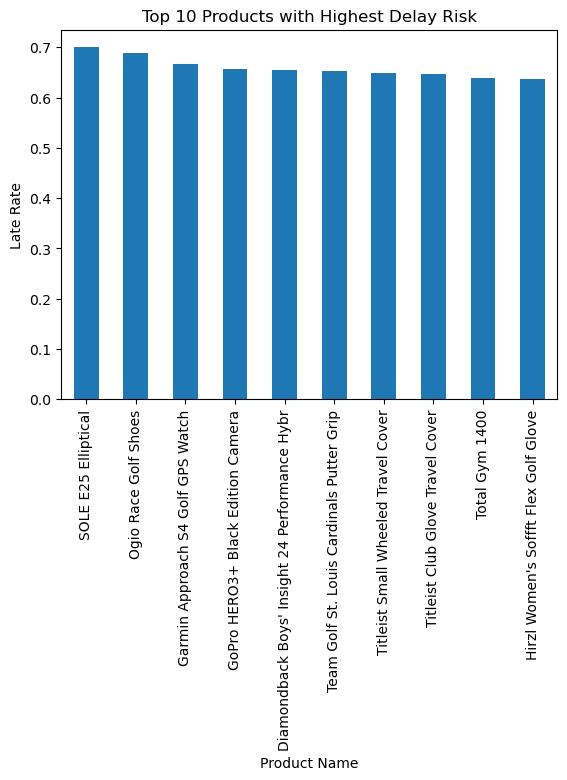

In [32]:
# 1. Products with Highest Delay Risk

plt.figure()
top_products.plot(kind='bar')
plt.title("Top 10 Products with Highest Delay Risk")
plt.ylabel("Late Rate")
plt.show()


In [66]:
# 1. Are certain Products associated with high delay risk?
# ---------------------------------------------
product_risk = df.groupby('Product Name')['Late'].mean().sort_values(ascending=False)
product_risk.head(10)

Product Name
SOLE E25 Elliptical                              0.700000
Ogio Race Golf Shoes                             0.688525
Garmin Approach S4 Golf GPS Watch                0.666667
GoPro HERO3+ Black Edition Camera                0.656250
Diamondback Boys' Insight 24 Performance Hybr    0.655172
Team Golf St. Louis Cardinals Putter Grip        0.651757
Titleist Small Wheeled Travel Cover              0.648148
Titleist Club Glove Travel Cover                 0.647059
Total Gym 1400                                   0.638889
Hirzl Women's Soffft Flex Golf Glove             0.637584
Name: Late, dtype: float64

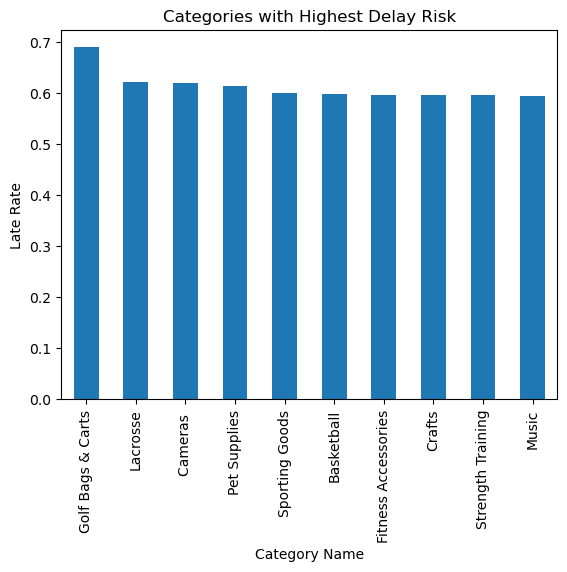

In [35]:
# 2. Categories with Low Availability Patterns
top_categories = df.groupby('Category Name')['Late'].mean().sort_values(ascending=False).head(10)

plt.figure()
top_categories.plot(kind='bar')
plt.title("Categories with Highest Delay Risk")
plt.ylabel("Late Rate")
plt.show()


In [67]:
# ---------------------------------------------
# 2. Do specific Categories show low availability patterns?
# ---------------------------------------------
category_risk = df.groupby('Category Name')['Late'].mean().sort_values(ascending=False)
category_risk.head(10)


Category Name
Golf Bags & Carts      0.688525
Lacrosse               0.620991
Cameras                0.619932
Pet Supplies           0.613821
Sporting Goods         0.599440
Basketball             0.597015
Fitness Accessories    0.595469
Crafts                 0.595041
Strength Training      0.594595
Music                  0.594470
Name: Late, dtype: float64

C:\Users\Abin\AppData\Local\Temp\ipykernel_14060\799399102.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantity_bins = df.groupby(pd.qcut(df['Order Item Quantity'], 5, duplicates='drop'))['Late'].mean()


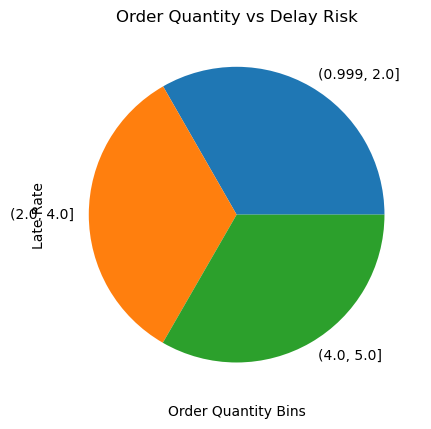

In [41]:
# 3. Order Quantity vs Delay Risk
quantity_bins = df.groupby(pd.qcut(df['Order Item Quantity'], 5, duplicates='drop'))['Late'].mean()

plt.figure()
quantity_bins.plot(kind='pie')
plt.title("Order Quantity vs Delay Risk")
plt.xlabel("Order Quantity Bins")
plt.ylabel("Late Rate")
plt.show()


In [72]:
# ---------------------------------------------
# 3. Relationship between Order Quantity and Delay
# ---------------------------------------------
quantity_delay = df.groupby(pd.qcut(df['Order Item Quantity'], 5, duplicates='drop'))['Late'].mean()
quantity_delay


C:\Users\Abin\AppData\Local\Temp\ipykernel_14060\50353153.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantity_delay = df.groupby(pd.qcut(df['Order Item Quantity'], 5, duplicates='drop'))['Late'].mean()


Order Item Quantity
(0.999, 2.0]    0.572294
(2.0, 4.0]      0.574241
(4.0, 5.0]      0.572823
Name: Late, dtype: float64

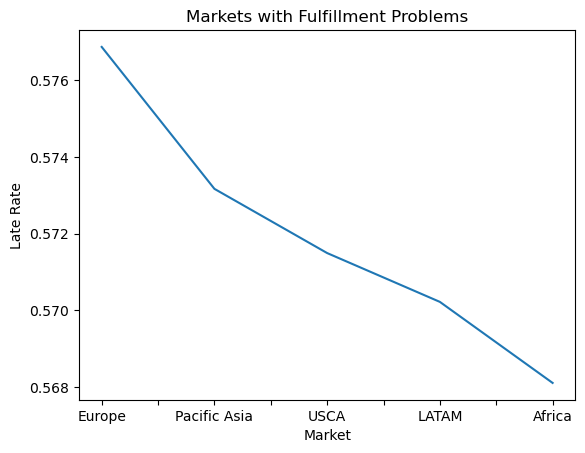

In [43]:
# 4. Market Fulfillment Risk
market_risk = df.groupby('Market')['Late'].mean().sort_values(ascending=False)

plt.figure()
market_risk.plot(kind='line')
plt.title("Markets with Fulfillment Problems")
plt.ylabel("Late Rate")
plt.show()


In [73]:
# ---------------------------------------------
# 4. Which Markets face fulfillment problems?
# ---------------------------------------------
market_fulfillment_risk = df.groupby('Market')['Late'].mean().sort_values(ascending=False)
market_fulfillment_risk


Market
Europe          0.576873
Pacific Asia    0.573170
USCA            0.571495
LATAM           0.570221
Africa          0.568107
Name: Late, dtype: float64

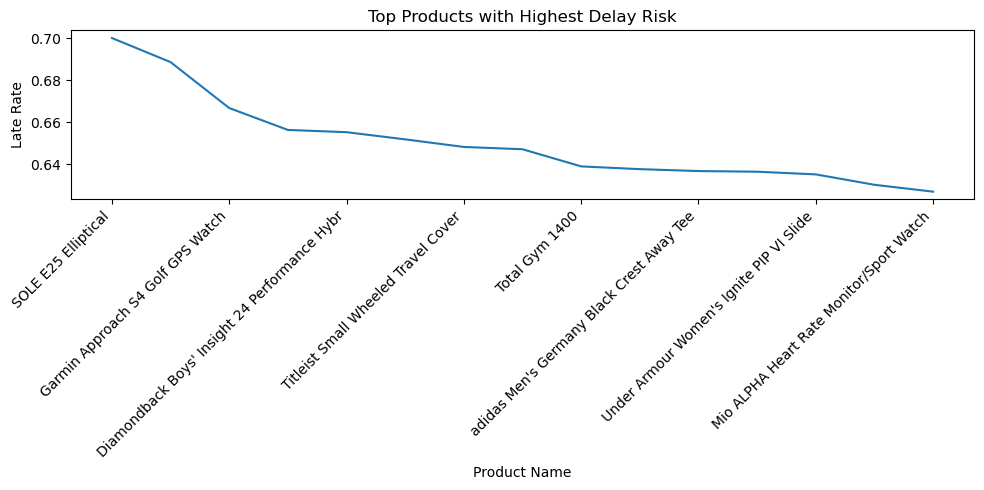

In [46]:
# 5. High-Demand Products vs Failure Risk
top_n = 15  # or 10

data = df.groupby('Product Name')['Late'].mean() \
         .sort_values(ascending=False) \
         .head(top_n)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
data.plot(kind='line')
plt.title("Top Products with Highest Delay Risk")
plt.ylabel("Late Rate")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [74]:
# ---------------------------------------------
# 5. Are high-demand products more failure-prone?
# ---------------------------------------------
product_demand = df.groupby('Product Name').agg({
    'Late': 'mean',
    'Sales': 'sum',
    'Order Item Quantity': 'sum'
}).sort_values('Sales', ascending=False)

product_demand.head(10)


,Late,Sales,Order Item Quantity
Product Name,,,
SOLE E25 Elliptical,0.700000,9.999.899.9029.999.899.9029.999.899.9029.999.8...,10
Under Armour Men's Tech II T-Shirt,0.625000,9.995.999.9089.995.999.9081.249.499.9691.249.4...,835
Team Golf Texas Longhorns Putter Grip,0.591973,9.995.999.9084.997.999.9541.249.499.9699.995.9...,895
Team Golf St. Louis Cardinals Putter Grip,0.651757,9.995.999.9081.249.499.9699.995.999.9089.995.9...,958
Titleist Pro V1x High Numbers Golf Balls,0.577358,9.598.000.3369.598.000.3362.399.499.9692.399.4...,800
Bridgestone e6 Straight Distance NFL San Dieg,0.577419,9.597.000.1226.397.999.9541.599.499.9691.599.4...,906
Under Armour Men's Compression EV SL Slide,0.550000,8.998.000.3364.499.000.1684.499.000.1681.349.7...,813
Hirzl Women's Soffft Flex Golf Glove,0.637584,8.994.999.6958.994.999.6951.798.999.9777.195.9...,889
Adult dog supplies,0.613821,8.440.000.1538.440.000.1538.440.000.1538.440.0...,492


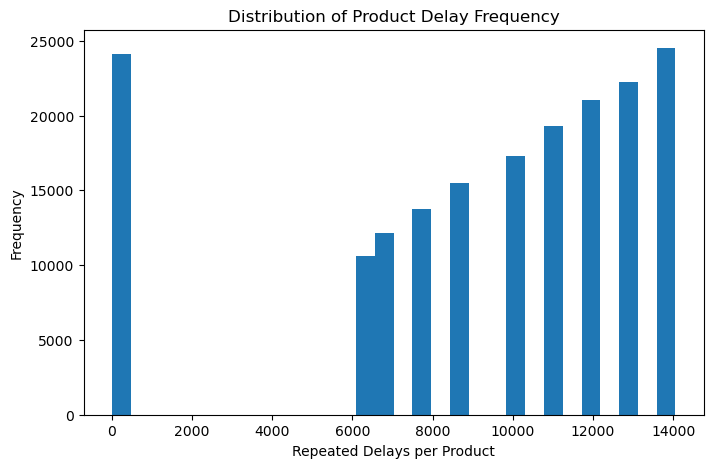

In [51]:
# 6. Repeated Delays → Stockout Risk Proxy

# Create Late flag (if not already created)
df['Late'] = (df['Days for shipping (real)'] > df['Days for shipment (scheduled)']).astype(int)

# Count repeated delays per product
product_delay_count = df.groupby('Product Name')['Late'].sum()

# Map back to each row
df['Product_Delay_Frequency'] = df['Product Name'].map(product_delay_count)

# Create Stockout Risk proxy (Top 25% most delayed products)
threshold = df['Product_Delay_Frequency'].quantile(0.75)
df['Stockout_Risk'] = (df['Product_Delay_Frequency'] >= threshold).astype(int)

plt.figure(figsize=(8,5))
df['Product_Delay_Frequency'].plot(kind='hist',bins=30)
plt.title("Distribution of Product Delay Frequency")
plt.xlabel("Repeated Delays per Product")
plt.show()


In [75]:
# ---------------------------------------------
# 6. Stockout proxy: repeated delays per product
# ---------------------------------------------
product_delay_count = df.groupby('Product Name')['Late'].sum()
df['Product_Delay_Frequency'] = df['Product Name'].map(product_delay_count)

# High stockout risk label (top 25% repeated delays)
threshold = df['Product_Delay_Frequency'].quantile(0.75)
df['Stockout_Risk'] = (df['Product_Delay_Frequency'] >= threshold).astype(int)

df[['Product Name','Product_Delay_Frequency','Stockout_Risk']].head()


,Product Name,Product_Delay_Frequency,Stockout_Risk
0,Smart watch,214,0
1,Smart watch,214,0
2,Smart watch,214,0
3,Smart watch,214,0
4,Smart watch,214,0


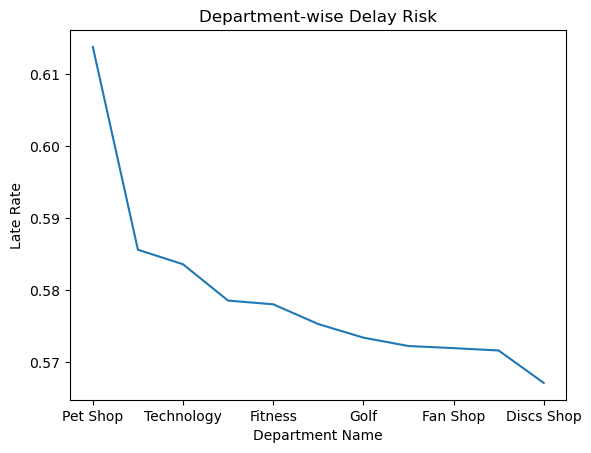

In [55]:
# 7. Department-Level Imbalance
dept_risk = df.groupby('Department Name')['Late'].mean().sort_values(ascending=False)

plt.figure()
dept_risk.plot(kind='line')
plt.title("Department-wise Delay Risk")
plt.ylabel("Late Rate")
plt.show()


In [76]:
# ---------------------------------------------
# 7. Department-level imbalance
# ---------------------------------------------
department_risk = df.groupby('Department Name')['Late'].mean().sort_values(ascending=False)
department_risk


Department Name
Pet Shop              0.613821
Health and Beauty     0.585635
Technology            0.583618
Outdoors              0.578567
Fitness               0.578056
Book Shop             0.575309
Golf                  0.573420
Footwear              0.572255
Fan Shop              0.571963
Apparel               0.571636
Discs Shop            0.567127
Name: Late, dtype: float64

C:\Users\Abin\AppData\Local\Temp\ipykernel_14060\1514977159.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_pressure = temp.groupby(pd.qcut(temp['Sales per customer'], 5))['Late'].mean()


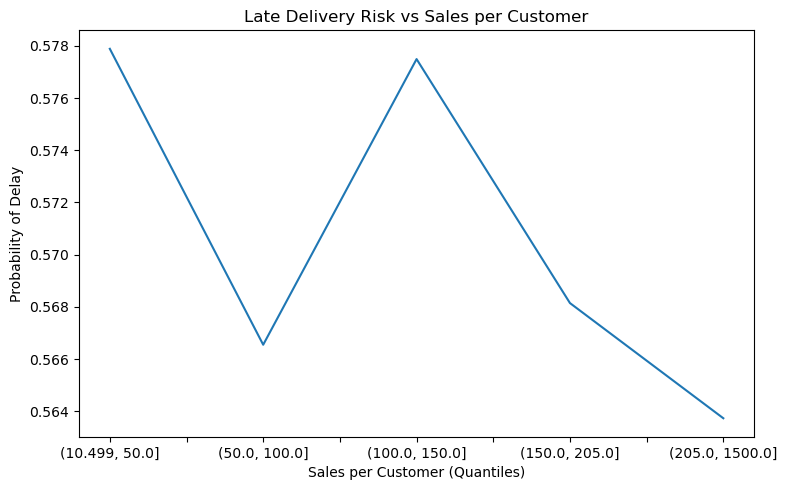

In [62]:
# 8. Sales per Customer vs Inventory Pressure

# Ensure numeric type
df['Sales per customer'] = pd.to_numeric(df['Sales per customer'], errors='coerce')

# Drop rows where conversion failed
temp = df.dropna(subset=['Sales per customer', 'Late'])

# Now apply qcut safely
sales_pressure = temp.groupby(pd.qcut(temp['Sales per customer'], 5))['Late'].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sales_pressure.plot(kind='line')
plt.title("Late Delivery Risk vs Sales per Customer")
plt.xlabel("Sales per Customer (Quantiles)")
plt.ylabel("Probability of Delay")
plt.tight_layout()
plt.show()



In [78]:
# ---------------------------------------------
# 8. Sales per customer vs Quantity vs Delay
# ---------------------------------------------
pressure_analysis = df.groupby(pd.qcut(df['Sales per customer'], 5,duplicates='drop'))['Late'].mean()
quantity_pressure = df.groupby(pd.qcut(df['Order Item Quantity'], 5,duplicates='drop'))['Late'].mean()

pressure_analysis, quantity_pressure


C:\Users\Abin\AppData\Local\Temp\ipykernel_14060\1456394438.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pressure_analysis = df.groupby(pd.qcut(df['Sales per customer'], 5,duplicates='drop'))['Late'].mean()
C:\Users\Abin\AppData\Local\Temp\ipykernel_14060\1456394438.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantity_pressure = df.groupby(pd.qcut(df['Order Item Quantity'], 5,duplicates='drop'))['Late'].mean()


(Sales per customer
 (10.499, 50.0]     0.577884
 (50.0, 100.0]      0.566552
 (100.0, 150.0]     0.577491
 (150.0, 205.0]     0.568148
 (205.0, 1500.0]    0.563737
 Name: Late, dtype: float64,
 Order Item Quantity
 (0.999, 2.0]    0.572294
 (2.0, 4.0]      0.574241
 (4.0, 5.0]      0.572823
 Name: Late, dtype: float64)

C:\Users\Abin\AppData\Local\Temp\ipykernel_14060\1253746492.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_risk = temp.groupby(


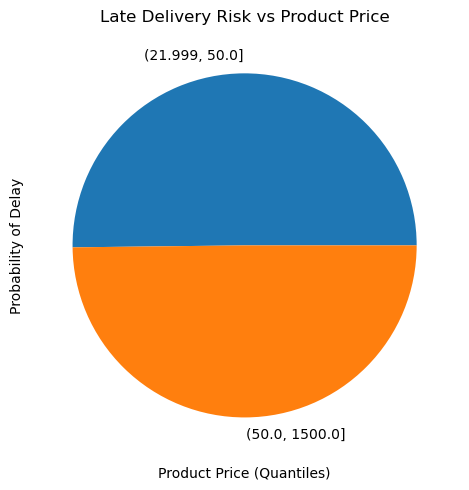

In [65]:
# 9. Premium Products vs Availability
# Convert Product Price to numeric
df['Product Price'] = pd.to_numeric(df['Product Price'], errors='coerce')

# Work on valid rows only
temp = df.dropna(subset=['Product Price', 'Late'])

# Use qcut safely (also handle duplicate bin edges)
price_risk = temp.groupby(
    pd.qcut(temp['Product Price'], 5, duplicates='drop')
)['Late'].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
price_risk.plot(kind='pie')
plt.title("Late Delivery Risk vs Product Price")
plt.xlabel("Product Price (Quantiles)")
plt.ylabel("Probability of Delay")
plt.tight_layout()
plt.show()



In [80]:
# ---------------------------------------------
# 9. Premium products vs availability
# ---------------------------------------------
price_risk = df.groupby(pd.qcut(df['Product Price'], 5,duplicates='drop'))['Late'].mean()
price_risk


C:\Users\Abin\AppData\Local\Temp\ipykernel_14060\1634634299.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_risk = df.groupby(pd.qcut(df['Product Price'], 5,duplicates='drop'))['Late'].mean()


Product Price
(21.999, 50.0]    0.571803
(50.0, 1500.0]    0.567671
Name: Late, dtype: float64

In [ ]:
# ---------------------------------------------
# 10. Predict potential stockouts (ML Model)
# ---------------------------------------------


# Features and target
features = [
    'Order Item Quantity',
    'Product Price',
    'Sales per customer',
    'Days for shipment (scheduled)',
    'Days for shipping (real)'
]

X = df[features]
y = df['Late']   # 0/1 target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Pipeline: Impute → Model
pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("model", RandomForestClassifier(n_estimators=300, random_state=42))
])

pipe.fit(X_train, y_train)

y_prob = pipe.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)

print("AUC=",auc)


In [90]:
features = [
    'Order Item Quantity',
    'Product Price',
    'Sales per customer',
    'Late_delivery_risk',
    'Product_Delay_Frequency',
    'Days for shipping (real)',
    'Days for shipment (scheduled)'
]

X = df[features]
y = df['Late']


In [91]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("model", RandomForestClassifier(n_estimators=300, random_state=42))
])

pipe.fit(X_train, y_train)

y_prob = pipe.predict_proba(X_test)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


ROC-AUC: 1.0


In [92]:
import pandas as pd

importances = pipe.named_steps["model"].feature_importances_
imp_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(imp_df)


                         Feature  Importance
3             Late_delivery_risk    0.544859
5       Days for shipping (real)    0.294148
6  Days for shipment (scheduled)    0.160538
2             Sales per customer    0.000180
4        Product_Delay_Frequency    0.000169
0            Order Item Quantity    0.000054
1                  Product Price    0.000052


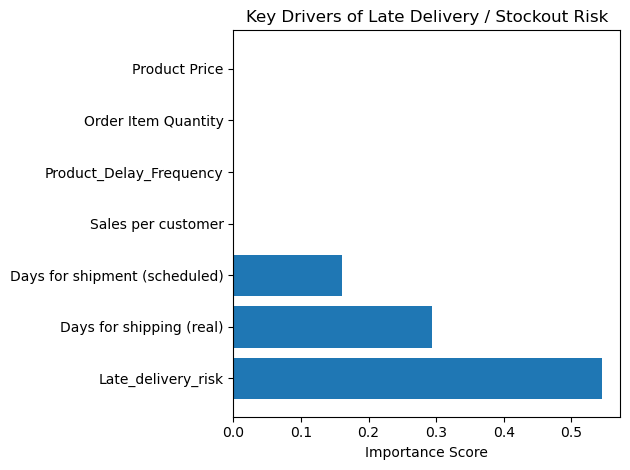

In [93]:
import matplotlib.pyplot as plt

plt.figure()
plt.barh(imp_df["Feature"], imp_df["Importance"])
plt.title("Key Drivers of Late Delivery / Stockout Risk")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


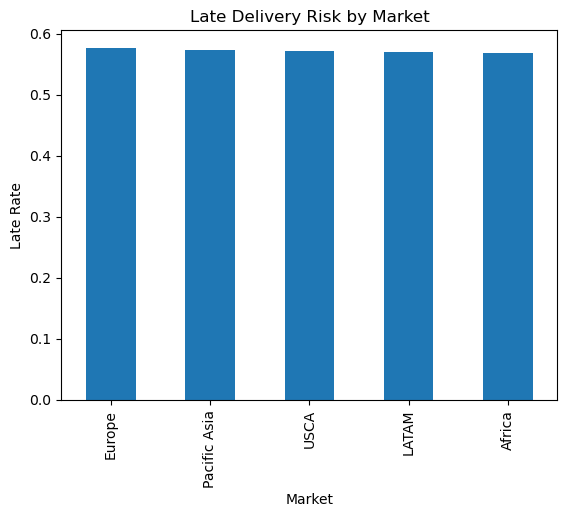

In [94]:
# Markets with Highest Delay Risk 
market_risk = df.groupby("Market")["Late"].mean().sort_values(ascending=False)

plt.figure()
market_risk.plot(kind="bar")
plt.title("Late Delivery Risk by Market")
plt.ylabel("Late Rate")
plt.show()


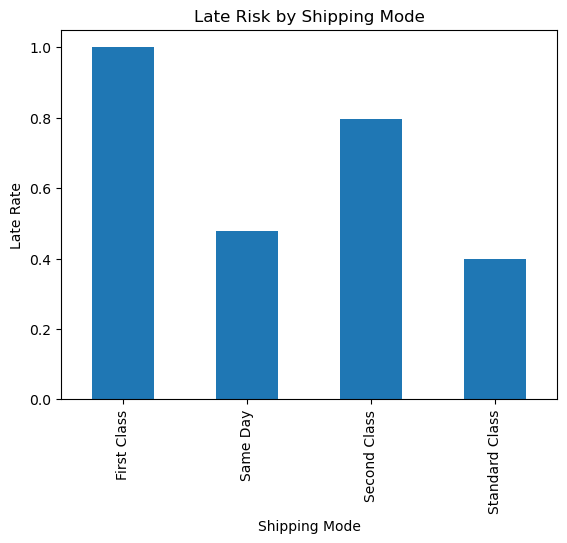

In [95]:
# Shipping Mode vs Delay 
ship_risk = df.groupby("Shipping Mode")["Late"].mean()

plt.figure()
ship_risk.plot(kind="bar")
plt.title("Late Risk by Shipping Mode")
plt.ylabel("Late Rate")
plt.show()


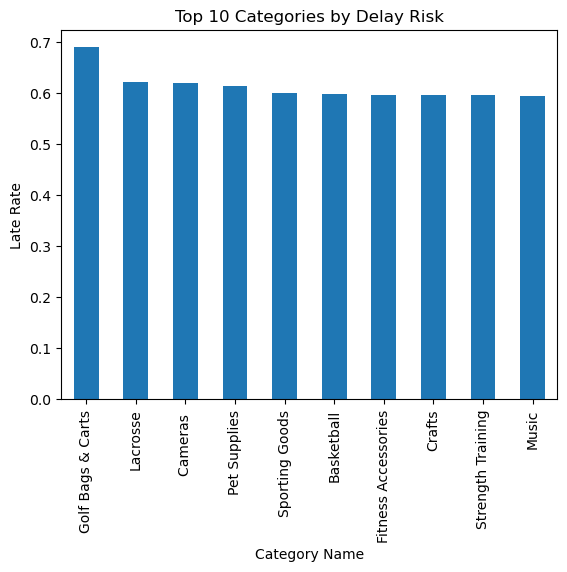

In [96]:
# Product Categories with Delays
cat_risk = df.groupby("Category Name")["Late"].mean().sort_values(ascending=False).head(10)

plt.figure()
cat_risk.plot(kind="bar")
plt.title("Top 10 Categories by Delay Risk")
plt.ylabel("Late Rate")
plt.show()


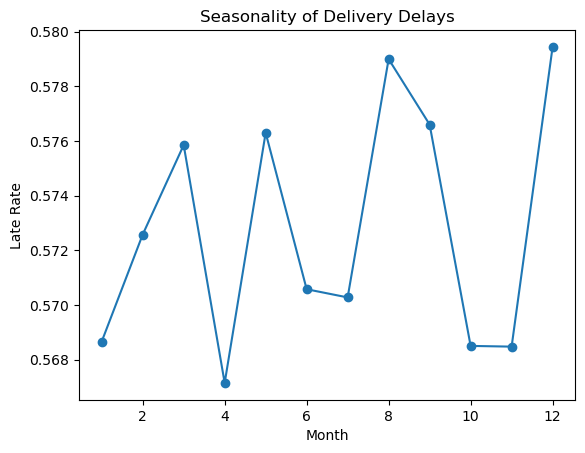

In [97]:
# Seasonality (Monthly Delays)
month_risk = df.groupby("Month")["Late"].mean()

plt.figure()
month_risk.plot(kind="line", marker="o")
plt.title("Seasonality of Delivery Delays")
plt.ylabel("Late Rate")
plt.xlabel("Month")
plt.show()
